In [1]:
import numpy as np
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model 
from sklearn.metrics import confusion_matrix 
import tensorflow_datasets as tfds



c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [3]:
builder = tfds.builder('tf_flowers')
info = builder.info
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='C:\\Users\\ACER\\tensorflow_datasets\\tf_flowers\\3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [4]:
train_data = tfds.load(name = "tf_flowers",split="train[:80%]",as_supervised=True,)
test_data = tfds.load(name = "tf_flowers",split="train[80%:]",as_supervised=True,)


In [5]:
print(train_data)
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
print("Total Number of classes: ",info.features['label'].num_classes)
print("Total Number of training: ",len(train_data))
print("Totel Number of testing: ",len(test_data))

Total Number of classes:  5
Total Number of training:  2936
Totel Number of testing:  734


In [7]:
labell = {
    0 : "daisy",
    1 : "dandelion",
    2 : "Tulip",
    3 : "Sunflowers",
    4 : "roses"
}

In [8]:
for i, example in enumerate(train_data.take(5)):
    print(f'Image {i+1} shape: {example[0].shape} label: {example[1]}')

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


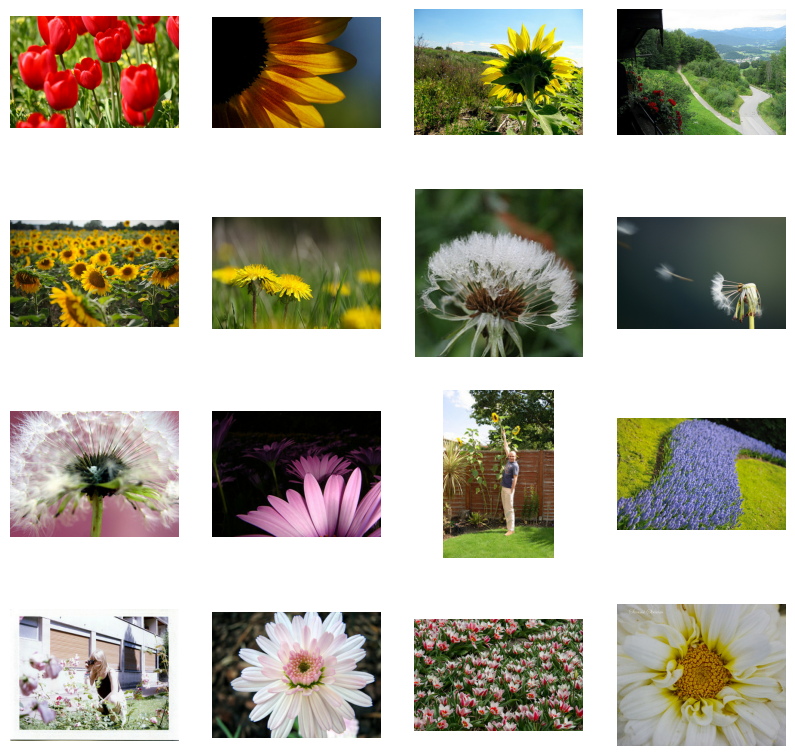

In [9]:
temp = 0
plt.figure(figsize=(10,10))
for image, label in train_data.take(16):
    temp+=1
    plt.subplot(4,4,temp)
    plt.imshow(image)
    plt.axis(False)

In [10]:
WIDTH = 224
HEIGHT = 224

In [11]:
def format_image(image):
    image = tf.image.resize(image,(WIDTH,HEIGHT))/255.0
    return image 

In [12]:
train_x =  []
train_y = []

for image, label in train_data.map(lambda x, y: (x, y)):  
    train_x.append(format_image(image))
    train_y.append(label)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [13]:
print("Shape of Train Data: ",train_x.shape,train_y.shape)

Shape of Train Data:  (2936, 224, 224, 3) (2936,)


In [14]:
test_x =  []
test_y = []

for image, label in test_data.map(lambda x, y: (x, y)):  
    test_x.append(format_image(image))
    test_y.append(label)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [15]:
print("Shape of Test Data: ",test_x.shape,test_y.shape)

Shape of Test Data:  (734, 224, 224, 3) (734,)


Tulip


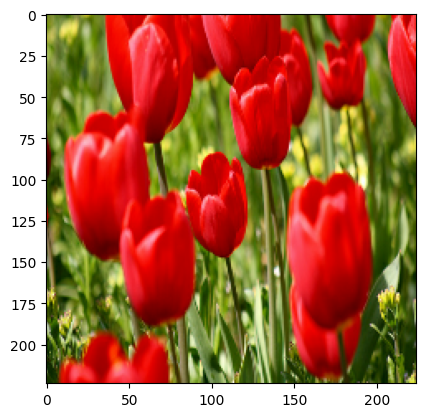

In [16]:
plt.imshow(train_x[0])
print(labell[train_y[0]])

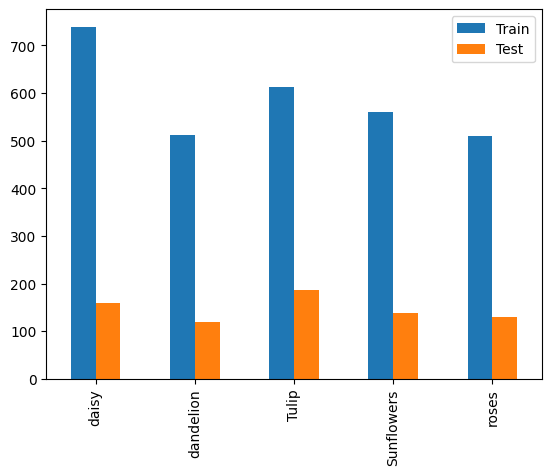

In [17]:
_,train_count = np.unique(train_y,return_counts=True)
_,test_count = np.unique(test_y,return_counts=True)
pd.DataFrame({'Train':train_count,'Test':test_count},index=labell.values()).plot.bar()
plt.show()

Model

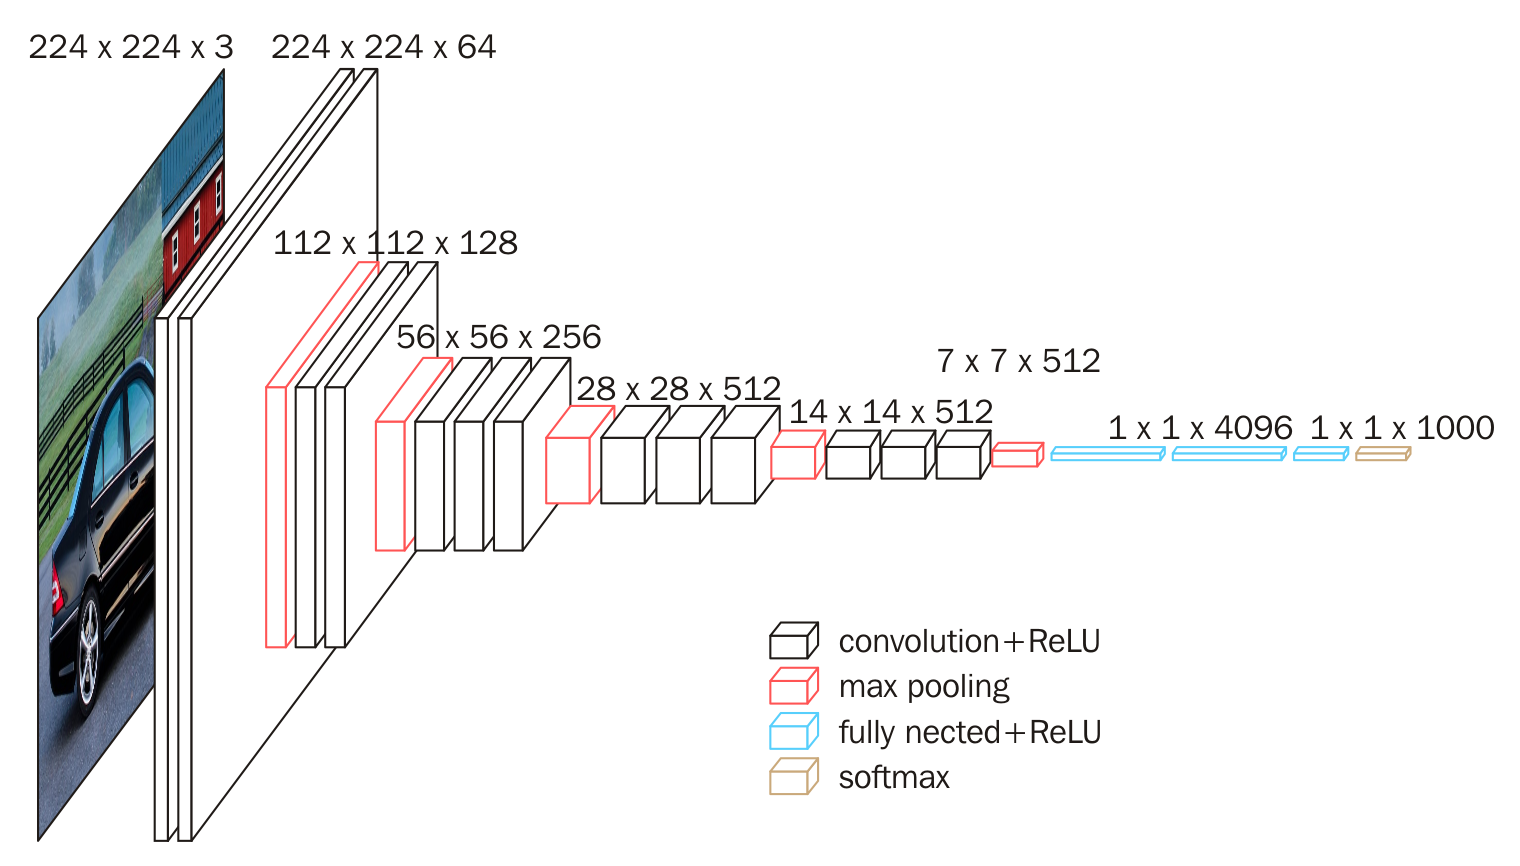

In [18]:
### VGG16
# model = tf.keras.Sequential()
# model.add(Conv2D(64,kernel_size= (3,3),padding= 'same',activation='relu',input_shape = (224,224,3)))
# model.add(Conv2D(64,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(MaxPooling2D((2,2),strides= (2,2)))

# model.add(Conv2D(128,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(Conv2D(128,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(MaxPooling2D((2,2),strides= (2,2)))

# model.add(Conv2D(256,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(Conv2D(256,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(Conv2D(256,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(MaxPooling2D((2,2),strides= (2,2)))

# model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(MaxPooling2D((2,2),strides= (2,2)))

# model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(Conv2D(512,kernel_size= (3,3),padding= 'same',activation='relu'))
# model.add(MaxPooling2D((2,2),strides= (2,2)))

# model.add(Flatten())
# model.add(Dense(4096,activation='relu'))
# model.add(Dense(4096,activation='relu'))
# model.add(Dense(5,activation='softmax'))

model1 = tf.keras.Sequential()
model1.add(Conv2D(32,kernel_size= (3,3),padding= 'same',activation='relu',input_shape = (224,224,3)))
model1.add(MaxPooling2D((2,2),strides= (2,2)))

model1.add(Conv2D(64,kernel_size= (3,3),padding= 'same',activation='relu'))
model1.add(MaxPooling2D((2,2),strides= (2,2)))

model1.add(Conv2D(96,kernel_size= (3,3),padding= 'same',activation='relu'))

model1.add(MaxPooling2D((2,2),strides= (2,2)))


model1.add(Flatten())

model1.add(Dense(5,activation='relu'))



In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0

In [20]:
model1.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [22]:
x_val = train_x[2500:]
y_val = train_y[2500:].reshape(436,1)
x_train = train_x[:2500,]
y_train = train_y[:2500].reshape(2500,1)

In [23]:
print("Shape of train: ",x_train.shape,y_train.shape)
print("Shape of val: ",x_val.shape,y_val.shape)

Shape of train:  (2500, 224, 224, 3) (2500, 1)
Shape of val:  (436, 224, 224, 3) (436, 1)


In [25]:
history = model1.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
79/79 [==============================] - 145s 2s/step - loss: 13.3256 - acc: 0.1688 - val_loss: 12.7540 - val_acc: 0.2087
Epoch 2/10
79/79 [==============================] - 127s 2s/step - loss: 13.3974 - acc: 0.1688 - val_loss: 12.7540 - val_acc: 0.2087
Epoch 3/10
79/79 [==============================] - 128s 2s/step - loss: 13.3974 - acc: 0.1688 - val_loss: 12.7540 - val_acc: 0.2087
Epoch 4/10
79/79 [==============================] - 128s 2s/step - loss: 13.3974 - acc: 0.1688 - val_loss: 12.7540 - val_acc: 0.2087
Epoch 5/10
79/79 [==============================] - 126s 2s/step - loss: 13.3974 - acc: 0.1688 - val_loss: 12.7540 - val_acc: 0.2087
Epoch 6/10
79/79 [==============================] - 125s 2s/step - loss: 13.3974 - acc: 0.1688 - val_loss: 12.7540 - val_acc: 0.2087
Epoch 7/10
53/79 [===================>..........] - ETA: 40s - loss: 13.2670 - acc: 0.1769

KeyboardInterrupt: 